# Prediction of the electrical consumption needs of buildings

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Exploratory analysis and data cleaning](#Exploratory-analysis-and-data-cleaning)
- [Prediction analysis](#Prediction-analysis)

## Context of the problem

The project consists on creating data based strategies for the city of Seattle in the USA. To achieve the goal of a carbon-neutral city by 2050, the team is paying close attention to emissions from non-residential buildings. Consumption data can be downloaded at this address https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv.

Predictions will be based on the declarative data of the commercial operating permit (size and use of buildings, mention of recent work, date of construction, etc.) 
We are also interested to assess the value of the "ENERGY STAR Score" for predicting emissions, which is tedious to calculate with the approach currently used.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

We have two data files corresponding to the years of 2015 and 2016. We will explore them:

## Pre-exploratory stage: General analysis and discovery of the files

### Description of 2015 data file:

In [5]:
data_file_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [6]:
print("The file contains {} rows and {} columns".format(data_file_2015.shape[0],data_file_2015.shape[1]))

The file contains 3340 rows and 47 columns


In [7]:
print(data_file_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [8]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

### Description of 2016 data file:

In [9]:
data_file_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [10]:
print("The file contains {} rows and {} columns".format(data_file_2016.shape[0],data_file_2015.shape[1]))

The file contains 3376 rows and 47 columns


In [11]:
print(data_file_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [12]:
data_file_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Comparison between 2015 and 2016 data files:

We will verify now if the data files from 2015 and 2016 have the same shape.

In [13]:
list_data_file_2015 = list(data_file_2015)
list_data_file_2016 = list(data_file_2016)

In [14]:
list_data_file_2016 == list_data_file_2015

False

The datafiles from years 2015 and 2016 are different. To verify which columns are different:

In [15]:
# Code extracted from https://stackoverflow.com/questions/50203732/compare-column-names-of-pandas-dataframe

def comparison_columns_data_files(data_file_A, data_file_B):
    data_file_A_column = data_file_A.columns
    data_file_B_column = data_file_B.columns

    common_columns = data_file_A_column.intersection(data_file_B_column) # common columns between data frames
    data_file_A_not_in_data_file_B = data_file_A_column.difference(data_file_B_column) # Columns that are in 2015 data file that are not in 2016 data file
    data_file_B_not_in_data_file_A = data_file_B_column.difference(data_file_A_column) # Columns that are in 2016 data file that are not in 2015 data file

    return (common_columns, data_file_A_not_in_data_file_B, data_file_B_not_in_data_file_A)

In [16]:
comparison_columns_data_files(data_file_2015, data_file_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'DefaultData', 'ComplianceStatus', 'Outlier'],
       dtype='object'),
 Index(['2010 Census Tracts', 'City Council Distr

We will have a look at the column 'Location' from the 2015 data file.

In [17]:
data_file_2015['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

As we observe from the 2015 data file, Location column contains information about the latitude and longitude coordinates, which are present as columns in the 2016 data file. We will separate the information contained in 'Location' column o obtain the latitude and longitude information in order to put it into two separate columns.

In [18]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
import ast
data_file_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.Location.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['Location'], axis=1), data_file_2015['Location'].apply(pd.Series)], axis=1)
data_file_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.human_address.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['human_address'], axis=1), data_file_2015['human_address'].apply(pd.Series)], axis=1)
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

In [19]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [20]:
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

### Revision of data files variables

As the mission of the project is regarding the CO2 emissions, we should pay special atention to the variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'.

As described at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy, we have:

* **The variable 'GHGEmissionsIntensity' or 'GHGEmissionsIntensity(kgCO2e/ft2)'**, is the total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

* **The variable 'TotalGHGEmissions' or 'GHGEmissions(MetricTonsCO2e)'**, is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

In [21]:
data_file_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [22]:
data_file_2016['TotalGHGEmissions'].describe()      

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [23]:
data_file_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [24]:
data_file_2016['GHGEmissionsIntensity'].describe()


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

The variables 'GHGEmissionsIntensity(kgCO2e/ft2)' and 'GHGEmissionsIntensity' are of the same order of magnitud, as for the variables 'GHGEmissions(MetricTonsCO2e)' and 'TotalGHGEmissions'. We are going to rename these variables, plus the variables 'ZipCode' and 'Zip Codes', and we are going to use the variables names from the 2016 data file.

In [25]:
new_df_2015 = data_file_2015.copy()

In [26]:
new_df_2015 = new_df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Zip Codes':'ZipCode',
                                  'latitude':'Latitude',
                                  'longitude':'Longitude',
                                  'address':'Address'})

In order to keep only the variables that we are going to use in further analyses, we will have a look first at the meaning of all the common variables of the 2015 and 2016 data files. As previously mentioned, the description of the variables is at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy.
We will indicate here the variables relevant to our mission.

* **OSEBuildingID**: A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
* **DataYear**: Calendar year (January-December) represented by each data record.
* **BuildingType**: City of Seattle building type classification (e.g. Nonresidential, Multifamily).
* **PrimaryPropertyType**: The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
* **ZipCode, Latitude, Longitude and Address**: Property zip code, latitude and longitude coordinates, and physical address.
* **Neighborhood**: Property neighborhood area defined by the City of Seattle Department of Neighborhoods.
* **YearBuilt**: Year in which a property was constructed or underwent a complete renovation.
 

Regarding energy performance of buildings we have:

ENERGY STAR® is a joint program of the Environmental Protection Agency (EPA) and the Department of Energy (DOE). Its goal is to help consumers, businesses, and industry save money and protect the environment through the adoption of energy-efficient products and practices. (See ref. https://www.energy.gov/eere/buildings/energy-starr#:~:text=ENERGY%20STAR%C2%AE%20is%20a,energy%2Defficient%20products%20and%20practices).

Thus we have the following columns.

* **ENERGYSTARScore**: An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
* **SiteEUI(kBtu/sf)**: Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SourceEUI(kBtu/sf)**: Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SiteEnergyUse(kBtu)**: The annual amount of energy consumed by the property from all sources of energy.
* **Electricity(kBtu)**: The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
* **NaturalGas(kBtu)**: The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

Although the terms 'electricity' and 'energy' are often used interchangeably, it's important to understand that electricity is just one component of total energy consumption.

There are two types of EUI: site and source. Site EUI is the amount of heat and electricity a buildings consumes as reflected in utility bills. Source EUI traces heat and electricity use back to the original raw input creating a more holistic understanding of a building's energy use.

Other columns:

* **NumberofBuildings**: Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.
* **NumberofFloors**: Number of floors reported in Portfolio Manager.
* **PropertyGFATotal**: Total building and parking gross floor area.
* **PropertyGFABuilding(s)**: Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

Generally, the gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.

We are starting te removal of some columns from the data files of 2015 and 2016 that we are not going to use in further analysis.

In [27]:
new_df_2015 = new_df_2015.drop(columns=['2010 Census Tracts', 'City Council Districts', 'Comment', 'OtherFuelUse(kBtu)', 'SPD Beats',
                                'Seattle Police Department Micro Community Policing Plan Areas', 'ZipCode', 'city', 'state', 'zip'])

In [28]:
new_df_2016 = data_file_2016.copy()

In [29]:
new_df_2016 = new_df_2016.drop(columns=['City', 'Comments', 'ZipCode', 'State'])

We will compare now if the two data frames have the same columns. If so, we will proceed to create a new data frame for each year with the variables that we will consider as relevant now based on the variables descriptions shown previously.

In [30]:
comparison_columns_data_files(new_df_2015,new_df_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData',
        'ComplianceStatus', 'Outlier', 'Latitude', 'Longitu

### Selection of relevant columns for the creation of new data frame with 2015 and 2016 data files

In [228]:
columns_for_analyses = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt', 
                        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'NumberofBuildings', 'NumberofFloors',
                        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']

In [229]:
new_data_frame_2015 = new_df_2015.copy()

In [230]:
data_subset_2015 = new_data_frame_2015[columns_for_analyses]

In [231]:
data_subset_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,...,173.5,6981428.0,3686160.0,1272388.0,1,12.0,88434,88434,2.64,249.43
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,...,191.3,8354235.0,3905411.0,4448985.0,1,11.0,103566,88502,2.38,263.51
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,...,242.7,73130656.0,49762435.0,3709900.0,1,41.0,961990,961990,1.92,2061.48
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,...,636.3,28229320.0,2769023.0,2001894.0,1,10.0,61320,61320,31.38,1936.34
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,...,228.8,14829099.0,6066245.0,8763105.0,1,18.0,119890,107430,4.02,507.70


In [232]:
new_data_frame_2016 = new_df_2016.copy()

In [233]:
data_subset_2016 = new_data_frame_2016[columns_for_analyses]

In [234]:
data_subset_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2016,NonResidential,Hotel,47.61220,-122.33799,405 Olive way,DOWNTOWN,1927,60.0,...,182.500000,7226362.5,3946027.0,1276453.0,1.0,12,88434,88434,2.83,249.98
1,2,2016,NonResidential,Hotel,47.61317,-122.33393,724 Pine street,DOWNTOWN,1996,61.0,...,176.100006,8387933.0,3242851.0,5145082.0,1.0,11,103566,88502,2.86,295.86
2,3,2016,NonResidential,Hotel,47.61393,-122.33810,1900 5th Avenue,DOWNTOWN,1969,43.0,...,241.899994,72587024.0,49526664.0,1493800.0,1.0,41,956110,759392,2.19,2089.28
3,5,2016,NonResidential,Hotel,47.61412,-122.33664,620 STEWART ST,DOWNTOWN,1926,56.0,...,216.199997,6794584.0,2768924.0,1811213.0,1.0,10,61320,61320,4.67,286.43
4,8,2016,NonResidential,Hotel,47.61375,-122.34047,401 LENORA ST,DOWNTOWN,1980,75.0,...,211.399994,14172606.0,5368607.0,8803998.0,1.0,18,175580,113580,2.88,505.01


### Revision of duplicated values data frame for 2015

We will check at the duplicate values by looking at the variable 'OSEBuildingID'.

In [235]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: {}".format(data_subset_2015.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: 0


### Revision of duplicated values data frame for 2016

In [236]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: {}".format(data_subset_2016.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: 0


### Creation of new data frame according to relevant variables

We will create now a new data frame that contains the union between 2015 and 2016 data, so that we can perform our analysis.

In [237]:
new_df_both_years = pd.concat([data_subset_2015[data_subset_2016.columns],data_subset_2016], axis = 0, ignore_index=True).sort_values(["DataYear", "OSEBuildingID"])

In [238]:
new_df_both_years.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Latitude,Longitude,Address,Neighborhood,YearBuilt,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
0,1,2015,NonResidential,Hotel,47.612190,-122.337997,405 OLIVE WAY,DOWNTOWN,1927,65.0,...,173.5,6981428.0,3686160.0,1272388.0,1.0,12.0,88434,88434,2.64,249.43
1,2,2015,NonResidential,Hotel,47.613106,-122.333358,724 PINE ST,DOWNTOWN,1996,51.0,...,191.3,8354235.0,3905411.0,4448985.0,1.0,11.0,103566,88502,2.38,263.51
2,3,2015,NonResidential,Hotel,47.613349,-122.337699,1900 5TH AVE,DOWNTOWN,1969,18.0,...,242.7,73130656.0,49762435.0,3709900.0,1.0,41.0,961990,961990,1.92,2061.48
3,5,2015,NonResidential,Hotel,47.614216,-122.336609,620 STEWART ST,DOWNTOWN,1926,1.0,...,636.3,28229320.0,2769023.0,2001894.0,1.0,10.0,61320,61320,31.38,1936.34
4,8,2015,NonResidential,Hotel,47.613754,-122.340924,401 LENORA ST,DOWNTOWN,1980,67.0,...,228.8,14829099.0,6066245.0,8763105.0,1.0,18.0,119890,107430,4.02,507.70


In [239]:
print("The data frame for both years with the relevant variables contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame for both years with the relevant variables contains 6716 rows and 21 columns


## Exploratory analysis and data cleaning

### Revision of missing values

We need to know how many columns have more than 40% of missing values.

In [240]:
nan_values = 100 * new_df_both_years.isna().sum() / len(new_df_both_years) 
print ("The number of columns whose missing values are bigger than 40% is: {}".format(len(nan_values[nan_values > 40])))

The number of columns whose missing values are bigger than 40% is: 0


The next function creates a graph that shows the NaN values in each column of the dataframe passed to the function.

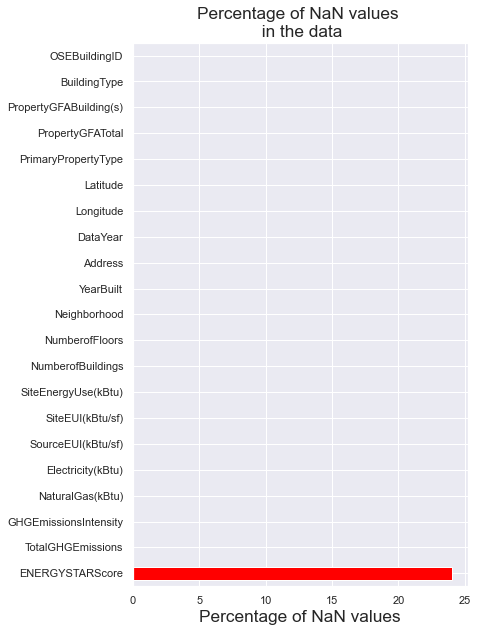

In [241]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')
graph_nan_values_per_column(new_df_both_years, (6,10))

In [242]:
new_df_both_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6715
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           6716 non-null   int64  
 1   DataYear                6716 non-null   int64  
 2   BuildingType            6716 non-null   object 
 3   PrimaryPropertyType     6716 non-null   object 
 4   Latitude                6716 non-null   float64
 5   Longitude               6716 non-null   float64
 6   Address                 6716 non-null   object 
 7   Neighborhood            6716 non-null   object 
 8   YearBuilt               6716 non-null   int64  
 9   ENERGYSTARScore         5093 non-null   float64
 10  SiteEUI(kBtu/sf)        6699 non-null   float64
 11  SourceEUI(kBtu/sf)      6697 non-null   float64
 12  SiteEnergyUse(kBtu)     6701 non-null   float64
 13  Electricity(kBtu)       6697 non-null   float64
 14  NaturalGas(kBtu)        6697 non-null   

### Exploratory analysis for data cleaning

Since we are mainly interested in the emissions of non-residential buildings, we are going to eliminate those values corresponding to residential buildings. For this we use the 'BuildingType' variable.

In [243]:
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [244]:
new_df_both_years = new_df_both_years[~new_df_both_years['BuildingType'].str.contains("Multifamily")]
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

With 'SPS-District K-12' being related to Seattle Public Schools.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

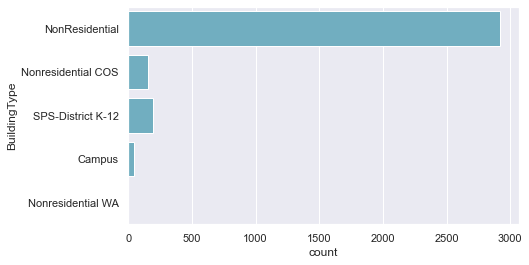

In [245]:
plt.subplots(figsize=(7, 4))
sns.countplot(y="BuildingType", data=new_df_both_years, color="c")

We are going to look at the 'PrimaryPropertyType'variable.

In [246]:
new_df_both_years = new_df_both_years[~(new_df_both_years['PrimaryPropertyType'].str.contains("Residence Hall"))
                                        & ~(new_df_both_years['PrimaryPropertyType'].str.contains("Multifamily"))]
new_df_both_years['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Restaurant',
       'University', 'Warehouse', 'Supermarket / Grocery Store', 'Office'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

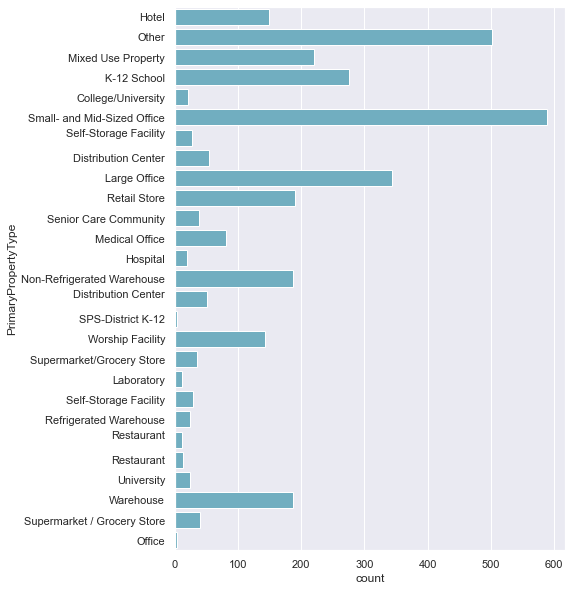

In [247]:
plt.subplots(figsize=(7, 10))
sns.countplot(y="PrimaryPropertyType", data=new_df_both_years, color="c")

We will look at the 'Neighborhood' column as well.

In [248]:
new_df_both_years['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

As we observed, 'DELRIDGE NEIGHBORHOODS' can be replaced with just 'DELRIDGE' denomination, so we keep unique values.

In [249]:
new_df_both_years['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
new_df_both_years['Neighborhood'] = new_df_both_years['Neighborhood'].map(lambda x: x.upper())

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

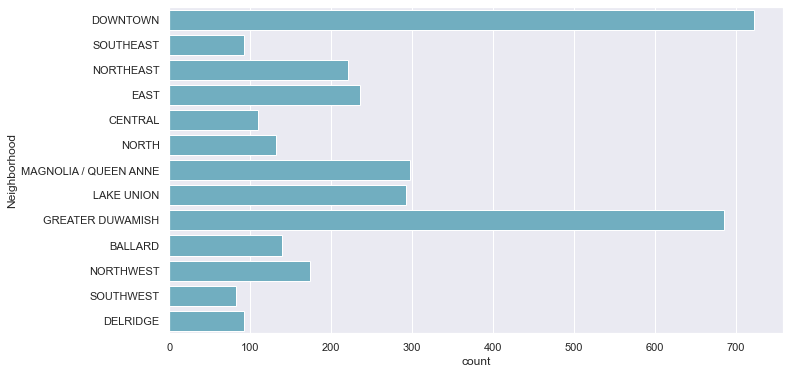

In [250]:
sns.countplot(y="Neighborhood", data=new_df_both_years, color="c")

In [251]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,2178.000000,3267.000000,3268.000000,3.268000e+03,3.268000e+03,3.268000e+03,3275.000000,3269.000000,3.277000e+03,3.277000e+03,3268.000000,3268.000000
mean,15837.746109,2015.501678,47.615669,-122.333179,1961.625877,64.851699,71.808877,176.094553,8.132269e+06,5.684194e+06,1.888383e+06,1.119084,4.130009,1.163565e+05,1.029435e+05,1.479465,178.259636
std,13382.344255,0.500073,0.048244,0.024593,32.654121,28.590074,72.727703,181.678648,2.540420e+07,1.751138e+07,7.945861e+06,2.233578,6.599019,2.525498e+05,2.354197e+05,2.224835,670.454794
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,-2.000000,0.000000e+00,-1.154170e+05,0.000000e+00,0.000000,0.000000,1.128500e+04,-5.055000e+04,-0.020000,-0.800000
25%,576.000000,2015.000000,47.585090,-122.343400,1930.000000,47.000000,33.299999,76.200000,1.221320e+06,7.251178e+05,0.000000e+00,1.000000,1.000000,2.963600e+04,2.858400e+04,0.270000,19.677500
50%,21116.000000,2016.000000,47.612170,-122.333160,1965.000000,72.500000,51.600000,131.550000,2.515115e+06,1.633868e+06,4.787845e+05,1.000000,2.000000,4.929900e+04,4.760200e+04,0.770000,49.060000
75%,24536.000000,2016.000000,47.648671,-122.322110,1989.000000,89.000000,81.900001,205.824998,6.992292e+06,4.904434e+06,1.476731e+06,1.000000,4.000000,1.047860e+05,9.447200e+04,1.732500,139.265000
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,6.570744e+08,2.979090e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000


As we observed in the previous table, different columns have negative values. Those are 'SourceEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'. We will eliminate the negative vaules.

In [252]:
new_df_both_years = new_df_both_years[(new_df_both_years['SourceEUI(kBtu/sf)']  >= 0) 
                                                & (new_df_both_years['PropertyGFABuilding(s)']  >= 0)
                                                & (new_df_both_years['GHGEmissionsIntensity']  >= 0)
                                                & (new_df_both_years['TotalGHGEmissions']  >= 0)
                                                & (new_df_both_years['Electricity(kBtu)']  >= 0)
                                                & (new_df_both_years['NaturalGas(kBtu)']  >= 0)]

In [253]:
new_df_both_years.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),GHGEmissionsIntensity,TotalGHGEmissions
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,2175.000000,3263.000000,3264.000000,3.264000e+03,3.264000e+03,3.264000e+03,3264.000000,3256.000000,3.264000e+03,3.264000e+03,3264.000000,3264.000000
mean,15795.184436,2015.502757,47.615612,-122.333191,1961.614583,64.819310,71.860619,176.214522,8.140474e+06,5.689539e+06,1.890697e+06,1.119485,4.135442,1.166324e+05,1.032215e+05,1.481186,178.466786
std,13356.316020,0.500069,0.048214,0.024565,32.657469,28.589906,72.752940,181.733647,2.541865e+07,1.752138e+07,7.950454e+06,2.237329,6.610639,2.530108e+05,2.358332e+05,2.225653,670.839394
min,1.000000,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.128500e+04,3.636000e+03,0.000000,0.000000
25%,574.750000,2015.000000,47.585050,-122.343428,1930.000000,47.000000,33.299999,76.275000,1.222924e+06,7.255212e+05,0.000000e+00,1.000000,1.000000,2.963475e+04,2.858550e+04,0.270000,19.715000
50%,21111.500000,2016.000000,47.612115,-122.333160,1965.000000,72.000000,51.600000,131.600003,2.518779e+06,1.634550e+06,4.793245e+05,1.000000,2.000000,4.968000e+04,4.767950e+04,0.780000,49.105000
75%,24532.000000,2016.000000,47.648653,-122.322146,1989.000000,89.000000,81.950001,206.250000,6.996959e+06,4.920563e+06,1.481258e+06,1.000000,4.000000,1.050708e+05,9.455325e+04,1.740000,139.350000
max,50226.000000,2016.000000,47.733870,-122.258640,2015.000000,100.000000,834.400024,2620.000000,8.739237e+08,6.570744e+08,2.979090e+08,111.000000,99.000000,9.320156e+06,9.320156e+06,34.090000,16870.980000


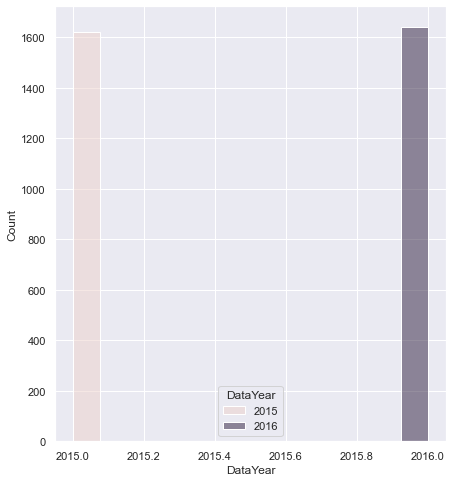

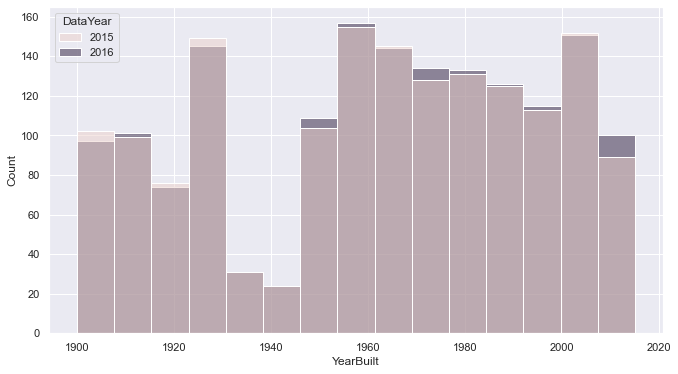

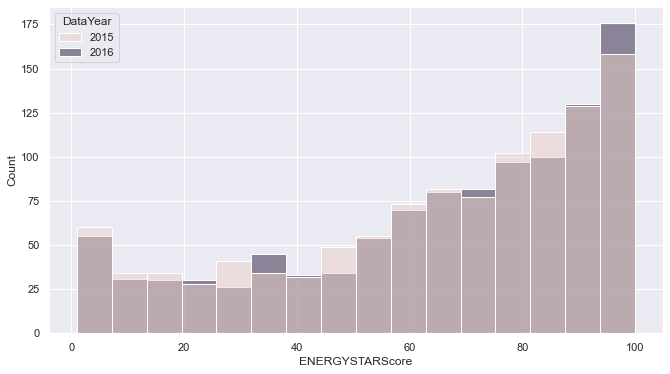

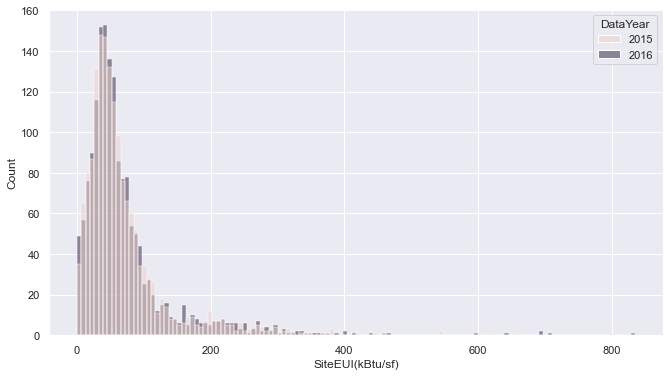

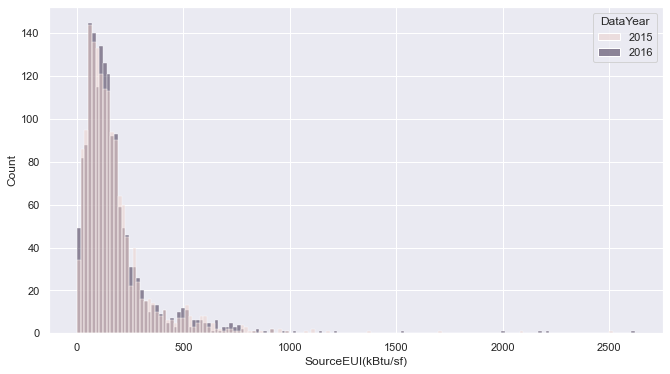

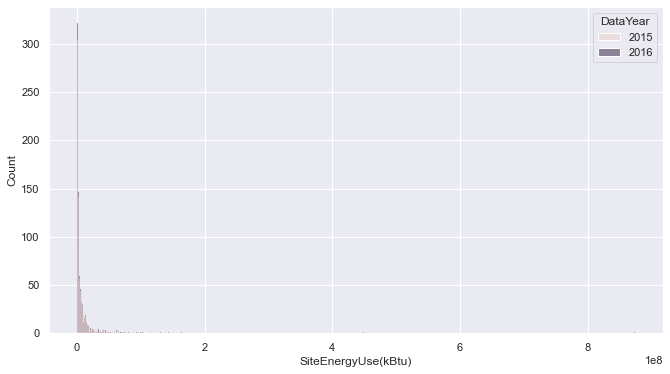

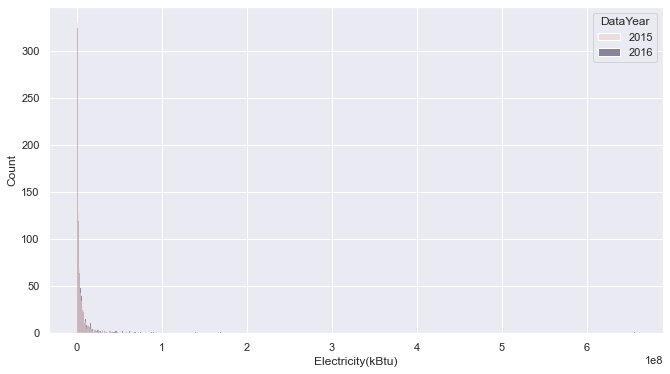

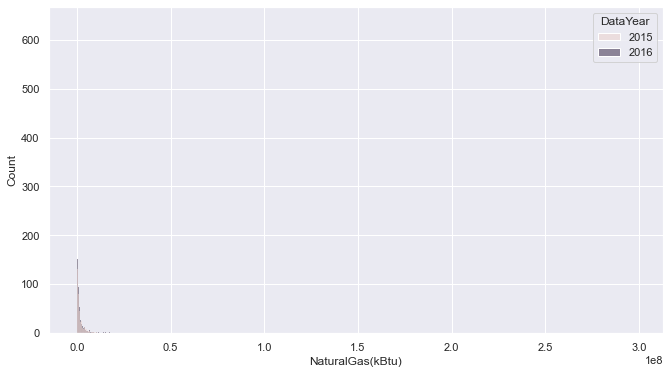

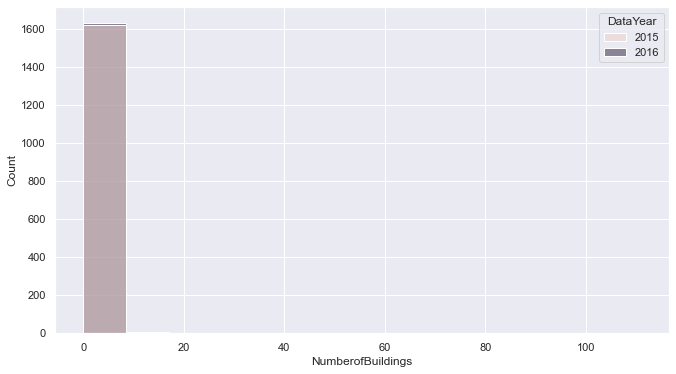

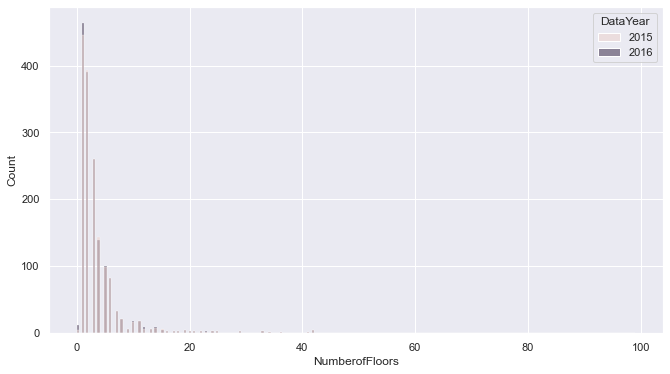

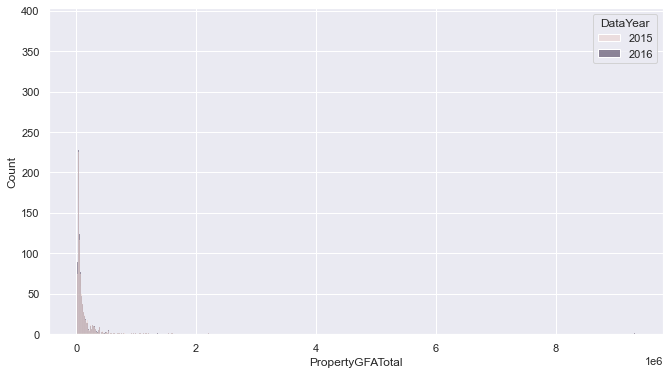

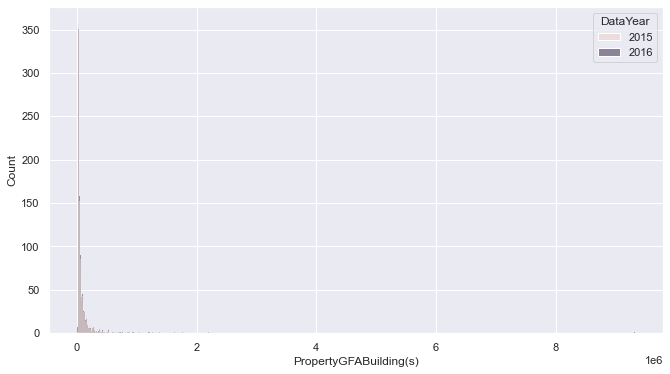

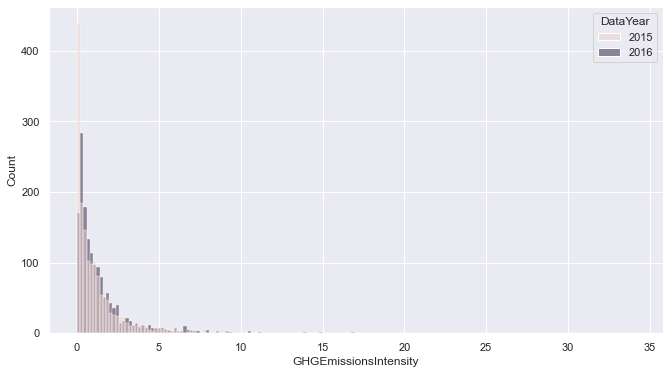

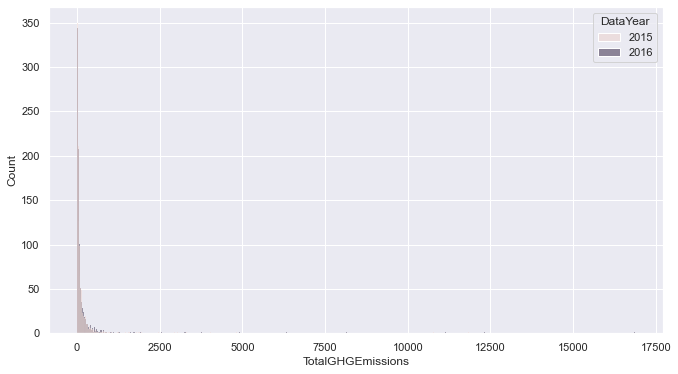

In [254]:
plt.subplots(figsize=(7, 8))

columns_to_drop_in_histogram=['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'OSEBuildingID', 'Latitude', 'Longitude', 'Address']

for i in new_df_both_years.columns:
    if i not in columns_to_drop_in_histogram:
        sns.histplot(data=new_df_both_years, x=i, color="cyan", hue="DataYear")
        plt.show()

In [255]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
# import folium
# map_osm = folium.Map()
# map_osm = folium.Map(location=[new_df_both_years['Latitude'].mean(), new_df_both_years['Longitude'].mean()], zoom_start=11, width=1000, height=1000, control_scale=True)
# for i in range(0,len(new_df_both_years)):
#     folium.Circle([new_df_both_years.iloc[i]['Latitude'],new_df_both_years.iloc[i]['Longitude']], 
#                       popup=new_df_both_years.iloc[i]['Address'], radius =100, color='red').add_to(map_osm)
# map_osm

In [256]:
print("The data frame with more clean data contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame with more clean data contains 3264 rows and 21 columns


### Pickling the cleaned data frame

After cleaning and filtering our data we pickle the already cleaned and filtered data frame. Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. For more details, consult references:

In [257]:
# To pickle the data frame

new_df_both_years.to_pickle("./pickle_data_cleaned.pkl")

### Correlation analysis

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/)

In [258]:
correlation_matrix = new_df_both_years.corr(method='kendall')

In [259]:
print(correlation_matrix)

                        OSEBuildingID  DataYear  Latitude  Longitude  \
OSEBuildingID                1.000000  0.013631 -0.010742   0.098695   
DataYear                     0.013631  1.000000  0.000172   0.004860   
Latitude                    -0.010742  0.000172  1.000000  -0.137762   
Longitude                    0.098695  0.004860 -0.137762   1.000000   
YearBuilt                   -0.050521  0.008015  0.057468   0.000817   
ENERGYSTARScore             -0.032602  0.021516  0.020162  -0.027588   
SiteEUI(kBtu/sf)            -0.056249  0.003906  0.097419  -0.023261   
SourceEUI(kBtu/sf)          -0.076408 -0.002932  0.096200  -0.036237   
SiteEnergyUse(kBtu)         -0.276636  0.000130  0.049795  -0.031697   
Electricity(kBtu)           -0.274090 -0.004386  0.044471  -0.039149   
NaturalGas(kBtu)            -0.061310  0.007181  0.042121   0.021859   
NumberofBuildings           -0.015511 -0.017740  0.005241   0.037821   
NumberofFloors              -0.237381 -0.006939  0.093091  -0.07

<AxesSubplot:>

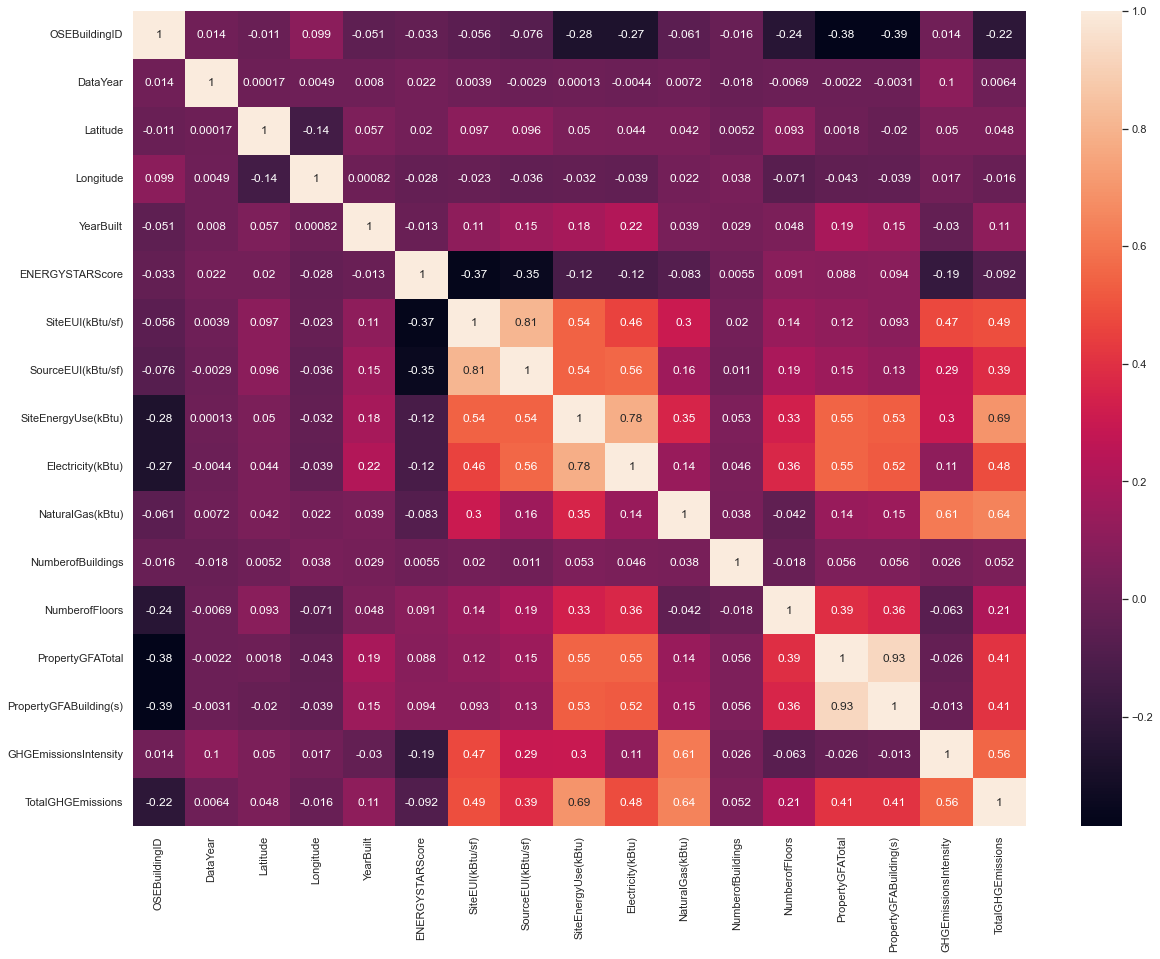

In [260]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

In [261]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning

threshold = 0.8
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(correlation_pairs[(abs(correlation_pairs) > threshold)]).reset_index().rename(columns={0:'Correlation coefficients'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('Correlation coefficients', ascending=False)

,level_0,level_1,Correlation coefficients
2,PropertyGFATotal,PropertyGFABuilding(s),0.927988
0,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.809493


Correlation Coefficient = +1: A perfect positive relationship. 

Correlation Coefficient >= 0.8: A fairly strong positive relationship.

### Preparation of variables for prediction analysis with different algorithms

In [315]:
new_df_both_years.columns 

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'TotalGHGEmissions'],
      dtype='object')

In [316]:
subset_columns_for_analysis = [
                                # 'OSEBuildingID', # ID not needed
                                # 'DataYear', # Refered as 2015 or 2016
                                # 'BuildingType', # Residential or Non-residential (not needed)
                                'PrimaryPropertyType',
                                # 'Latitude', 'Longitude', 'Address', # Physical address and coordinates not needed
                                'Neighborhood', 
                                'YearBuilt', 
                                # 'ENERGYSTARScore', # More than 20% percent of missing data
                                # 'SiteEUI(kBtu/sf)', # Property's Site Energy Use divided by its gross floor area. Related to the target variable 'SiteEnergyUse(kBtu)'
                                # 'SourceEUI(kBtu/sf)', # Highly correlated to 'SiteEUI(kBtu/sf)' (0.81)
                                'SiteEnergyUse(kBtu)',
                                'NumberofBuildings', 
                                'NumberofFloors', 
                                'PropertyGFATotal',
                                # 'PropertyGFABuilding(s)', # Highly correlated to 'PropertyGFATotal' (0.93)
                                # 'GHGEmissionsIntensity', # Greenhouse Gas Emissions divided by property's gross floor area. Related to the target variable 'TotalGHGEmissions' 
                                'TotalGHGEmissions', 
                                'Electricity(kBtu)',
                                'NaturalGas(kBtu)'
                            ]

In [317]:
subset_data_frame_for_analysis = new_df_both_years.copy()

In [318]:
new_data_frame_for_analysis = subset_data_frame_for_analysis[subset_columns_for_analysis]

In [319]:
new_data_frame_for_analysis.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,SiteEnergyUse(kBtu),NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
0,Hotel,DOWNTOWN,1927,6981428.0,1.0,12.0,88434,249.43,3686160.0,1272388.0
1,Hotel,DOWNTOWN,1996,8354235.0,1.0,11.0,103566,263.51,3905411.0,4448985.0
2,Hotel,DOWNTOWN,1969,73130656.0,1.0,41.0,961990,2061.48,49762435.0,3709900.0
3,Hotel,DOWNTOWN,1926,28229320.0,1.0,10.0,61320,1936.34,2769023.0,2001894.0
4,Hotel,DOWNTOWN,1980,14829099.0,1.0,18.0,119890,507.70,6066245.0,8763105.0


In [320]:
categorical_columns = ['PrimaryPropertyType', 'Neighborhood']

for i in new_data_frame_for_analysis.columns:
    if i not in categorical_columns:
        new_data_frame_for_analysis[i].fillna(new_data_frame_for_analysis[i].median(),inplace=True)

    else:
        new_data_frame_for_analysis[i].fillna('Unknown',inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [321]:
new_data_frame_for_analysis = new_data_frame_for_analysis.astype({'PrimaryPropertyType': 'category', 'Neighborhood': 'category'})

In [322]:
columns_to_categorical = new_data_frame_for_analysis.select_dtypes(['category']).columns

In [323]:
new_data_frame_for_analysis[columns_to_categorical] = new_data_frame_for_analysis[columns_to_categorical].apply(lambda x: x.cat.codes)

In [324]:
print("The data frame with analysis variables contains {} rows and {} columns".format(new_data_frame_for_analysis.shape[0],new_data_frame_for_analysis.shape[1]))

The data frame with analysis variables contains 3264 rows and 10 columns


In [325]:
new_data_frame_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 0 to 6715
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PrimaryPropertyType  3264 non-null   int8   
 1   Neighborhood         3264 non-null   int8   
 2   YearBuilt            3264 non-null   int64  
 3   SiteEnergyUse(kBtu)  3264 non-null   float64
 4   NumberofBuildings    3264 non-null   float64
 5   NumberofFloors       3264 non-null   float64
 6   PropertyGFATotal     3264 non-null   int64  
 7   TotalGHGEmissions    3264 non-null   float64
 8   Electricity(kBtu)    3264 non-null   float64
 9   NaturalGas(kBtu)     3264 non-null   float64
dtypes: float64(6), int64(2), int8(2)
memory usage: 364.9 KB


### Standardization and outliers detection

We are going to use Z-scores to detect outliers in our data. See references: 
* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [371]:
df_for_z_scores = new_data_frame_for_analysis.copy()

In [372]:
# standardize data
df_standardized = (df_for_z_scores - df_for_z_scores.mean()) / df_for_z_scores.std()

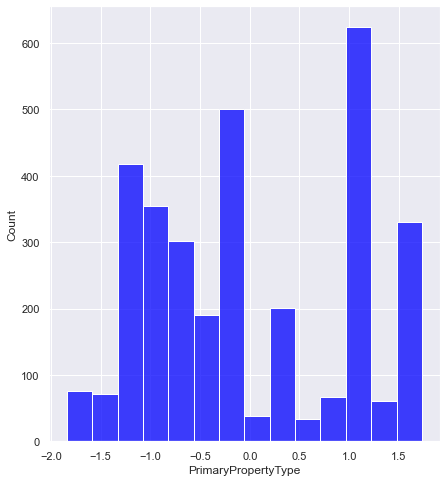

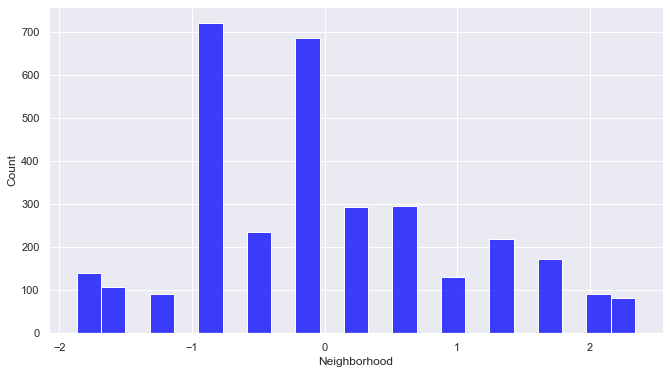

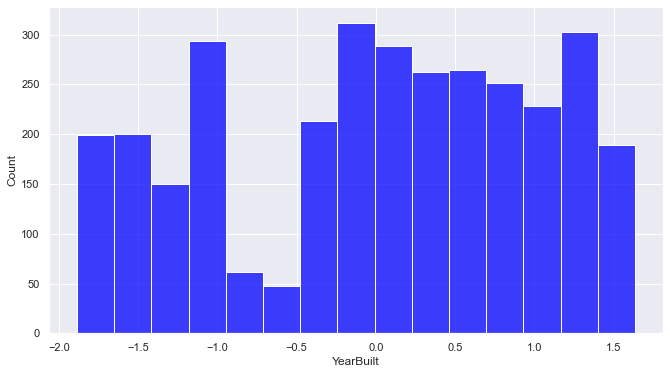

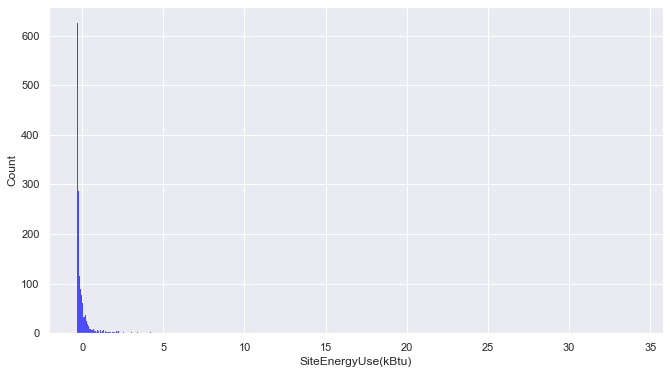

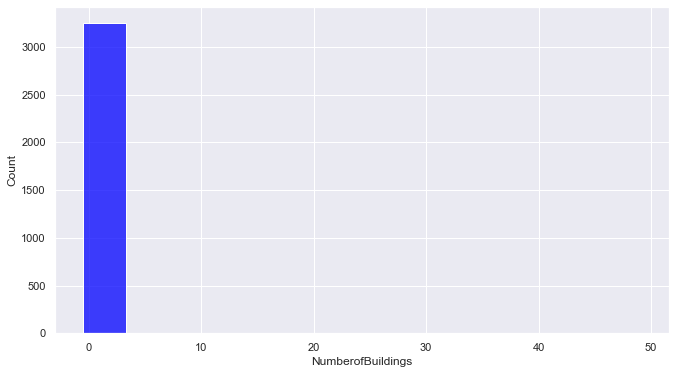

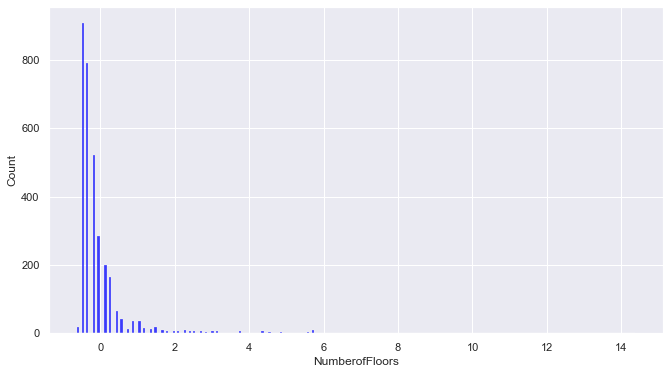

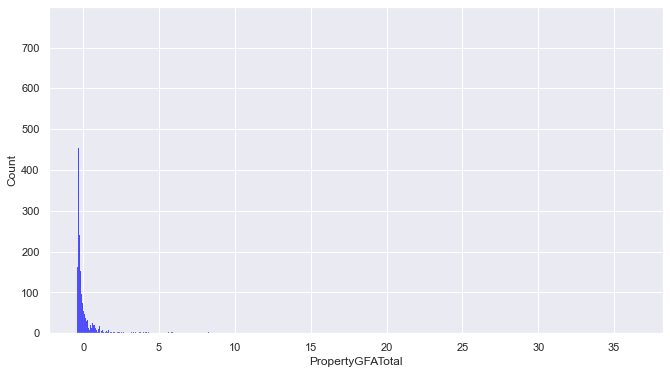

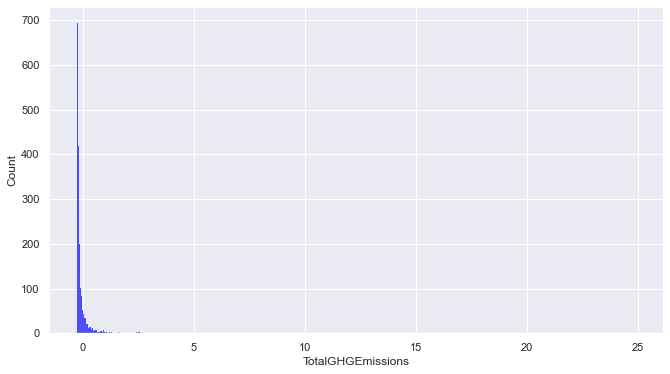

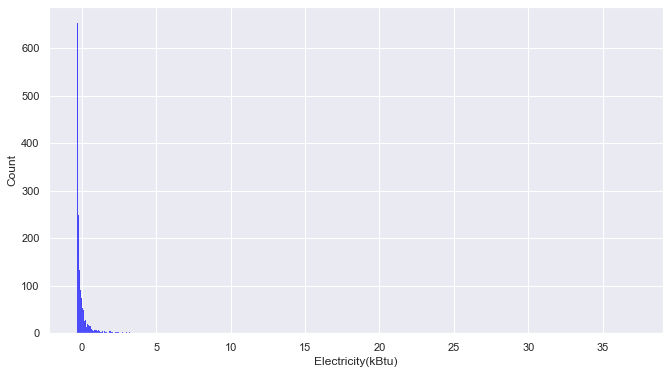

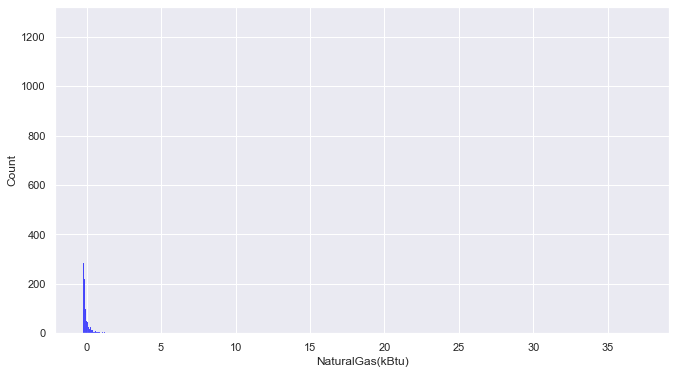

In [373]:
df_standardized.describe()
plt.subplots(figsize=(7, 8))
for i in df_standardized.columns:
    sns.histplot(data=df_standardized, x=i, color="blue")
    plt.show()

In [374]:
print("Standardized data frame contains {} rows and {} columns".format(df_standardized.shape[0],df_standardized.shape[1]))

Standardized data frame contains 3264 rows and 10 columns


We will remove outliers taking by considering a cut-off value of +/-2 of the Z-scores.

In [375]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['SiteEnergyUse(kBtu)'] >= -2) & (df_standardized['SiteEnergyUse(kBtu)'] <= 2)
                                                    & (df_standardized['NumberofFloors'] >= -2) & (df_standardized['NumberofFloors'] <= 2)
                                                    & (df_standardized['NumberofBuildings'] >= -2) & (df_standardized['NumberofBuildings'] <= 2)
                                                    & (df_standardized['PropertyGFATotal'] >= -2) & (df_standardized['PropertyGFATotal'] <= 2)
                                                    & (df_standardized['TotalGHGEmissions'] >= -2) & (df_standardized['TotalGHGEmissions'] <= 2)
                                                    & (df_standardized['Electricity(kBtu)'] >= -2) & (df_standardized['Electricity(kBtu)'] <= 2)
                                                    & (df_standardized['NaturalGas(kBtu)'] >= -2) & (df_standardized['NaturalGas(kBtu)'] <= 2)
                                                    ]

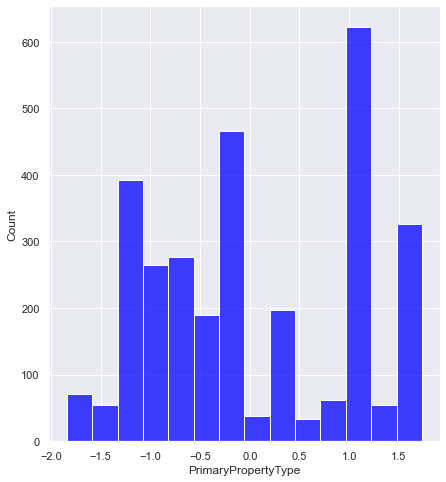

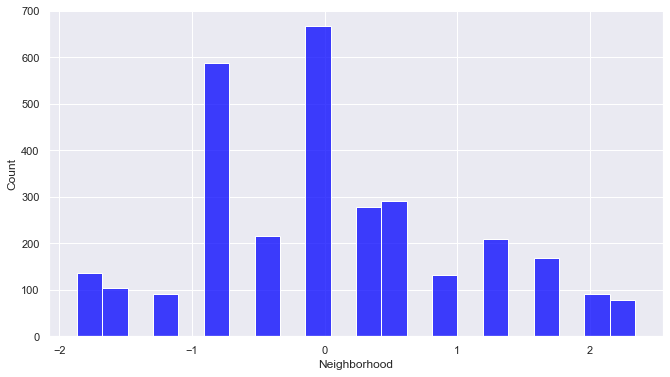

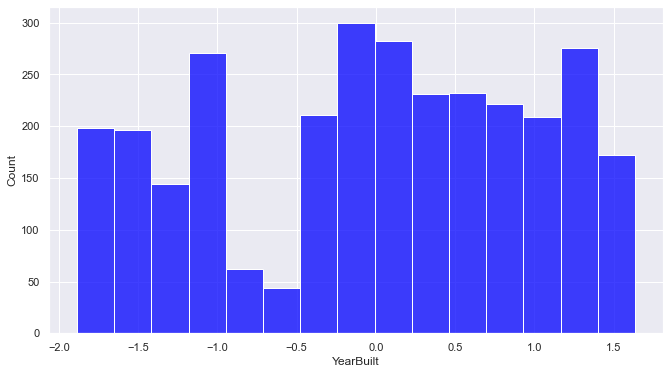

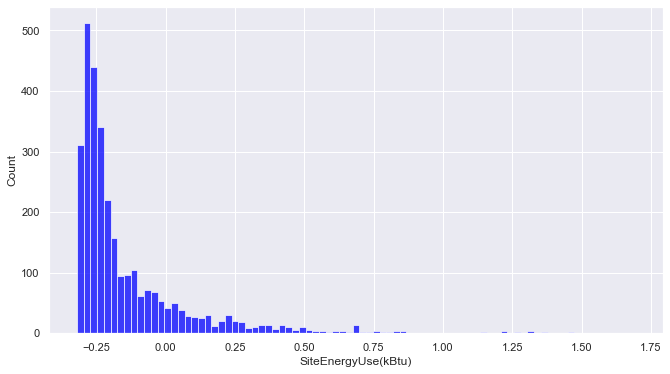

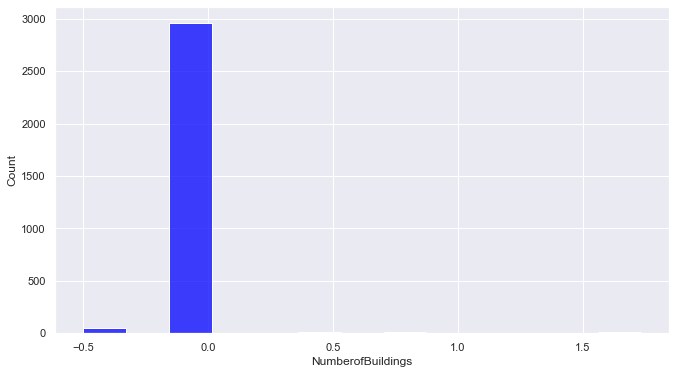

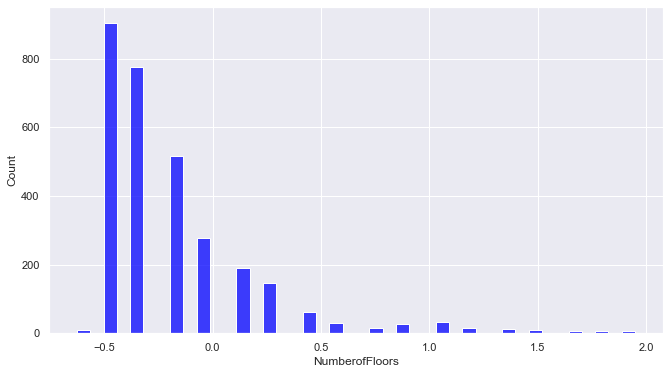

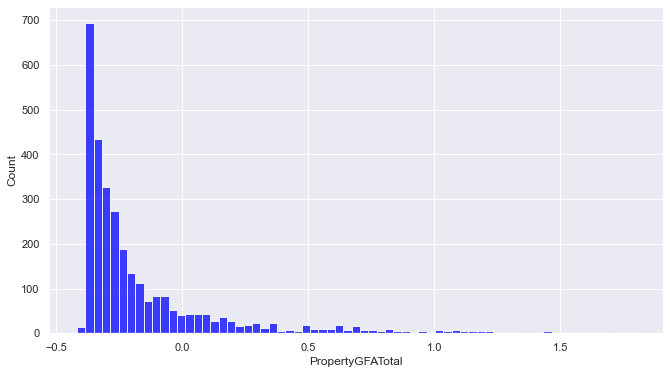

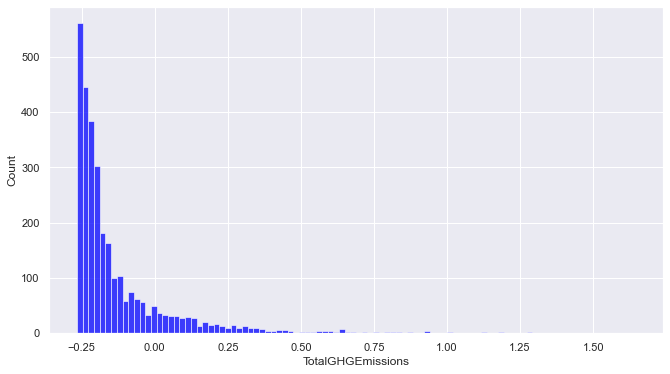

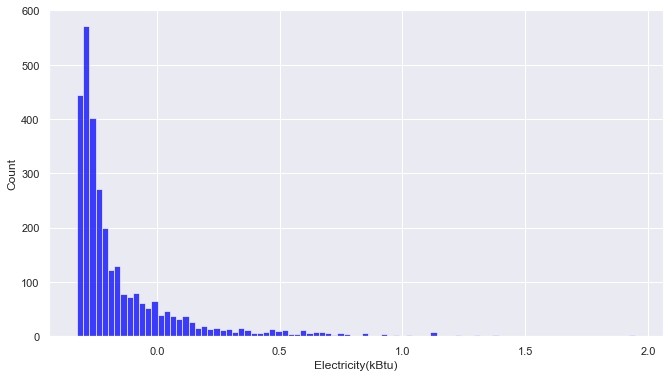

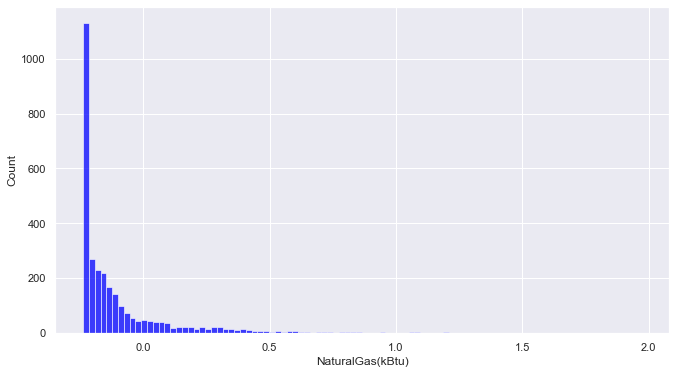

In [376]:
plt.subplots(figsize=(7, 8))
for i in df_standardized.columns:
    sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
    plt.show()

In [377]:
print("Standardized data frame without outliers contains {} rows and {} columns".format(df_standardized_without_outliers.shape[0],df_standardized_without_outliers.shape[1]))


Standardized data frame without outliers contains 3049 rows and 10 columns


## Prediction analysis

### Data splitting for training and test

#### Prediction of Green House Gas Emissions to evaluate models performance

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
def get_training_and_testing_data(data_frame, target_column):
    columns_to_remove_from_explicative_variables = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']
    training_data, testing_data = train_test_split(data_frame, test_size=0.2, random_state=25) # Here we use 80% for traning and 20% for test
    X_training_data = training_data.drop(columns = columns_to_remove_from_explicative_variables)
    y_training_data = training_data[target_column]
    X_testing_data = testing_data.drop(columns = columns_to_remove_from_explicative_variables)
    y_testing_data = testing_data[target_column]

    return(X_training_data, y_training_data, X_testing_data, y_testing_data)

In [380]:
X_training, y_training, X_test, y_test = get_training_and_testing_data(df_standardized_without_outliers, 'TotalGHGEmissions')

In [381]:
print(f"No. of training examples: {X_training.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 2439
No. of testing examples: 610


### Analysis using Linear Regression (Ordinary Least Squares)

We import the model of linear regression.

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

We will perform K-Fold Cross-Validation to evaluate the performance of the Linear Regression (Ordinary Least Squares) model. 

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

https://www.statology.org/k-fold-cross-validation/

https://www.datasciencesmachinelearning.com/2018/11/train-test-split-and-cross-validation.html

In [383]:
#define predictor and response variables

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
lin_reg = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(lin_reg, X_training, y_training, scoring='r2', cv=cv)

R2 will be a measure of the proportion of the variance within the data sample that is explained by the model.

In [384]:
#view mean absolute error
print('Array of R2 for each k-fold: ', scores)
print('mean R2: ', np.mean(scores))
print('R2 std: ', np.std(scores))

Array of R2 for each k-fold:  [0.89025251 0.72113298 0.93322334 0.92994358 0.85004795 0.94827262
 0.94893229 0.65345128 0.7117372  0.71364606]
mean R2:  0.8300639801319877
R2 std:  0.11106535491114182


We evaluated the model performance with values of R2 in the different k-folds. In order to train and test the linear regression model, we fit the training data set.

In [385]:
lin_reg = LinearRegression().fit(X_training, y_training)

Since the linear regression model is now trained, we can see its performance in the test data subset. Within the testing data, R2 gives information about the predictive quality of the model.

In [386]:
# Consult reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

print('Test Score: ', lin_reg.score(X_test, y_test)) # X_test and y_test corresponds to the unseen data. They will be used to test the model that will predict the target column.

Test Score:  0.7700007571930456


A high value of R2 in the testing data subset suggests that the regressive model has well fitted to the unseen data.

We will now test de model and we will predict the target column using the linear model with the testing data set. We will asign the prediction probabilities values to the variable y_GHG_emissions_linear_model.

In [387]:
# X_test is the set that is going to be passed to the model. Here we calculate prediction probabilities.
y_GHG_emissions_linear_model = lin_reg.predict(X_test)

We will now compare the linear model prediction against reality. For this we will use Mean Square Error (MSE) and Mean Absolute Error (MAE). 
Consult reference https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [388]:
from sklearn.metrics import mean_squared_error

# Mean squared error. See reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# mean_squared_error(y_true, y_pred)

print("Mean squared error for the classic linear regression model is:")
mean_squared_error(y_test, y_GHG_emissions_linear_model)

Mean squared error for the classic linear regression model is:


0.012380198109708663

In [389]:
from sklearn.metrics import mean_absolute_error

# Mean absolute error. See reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

# mean_absolute_error(y_true, y_pred)

print("Mean absolute error for the classic linear regression model is:")
mean_absolute_error(y_test, y_GHG_emissions_linear_model)

Mean absolute error for the classic linear regression model is:


0.03352371631425885

We will now create a data frame that will contain real and predicted target column values.

In [390]:
real_and_predicted_values_classic_linear_regression_df = pd.DataFrame()

In [391]:
real_and_predicted_values_classic_linear_regression_df['TotalGHGEmissions_real_values'] = y_test

In [392]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values
6362,-0.182960
1243,-0.251322
237,0.181613
344,-0.153594
4916,-0.265021


In [393]:
real_and_predicted_values_classic_linear_regression_df['TotalGHGEmissions_predicted_values_linear_model'] = y_GHG_emissions_linear_model

In [394]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_linear_model
6362,-0.182960,-0.191243
1243,-0.251322,-0.236839
237,0.181613,0.209670
344,-0.153594,-0.092379
4916,-0.265021,-0.267724


We will now plot the real and the predicted values of the target column that corresponds to the Total Green House Gas Emissions from the classic linear regression model.

<AxesSubplot:xlabel='TotalGHGEmissions_real_values', ylabel='TotalGHGEmissions_predicted_values_linear_model'>

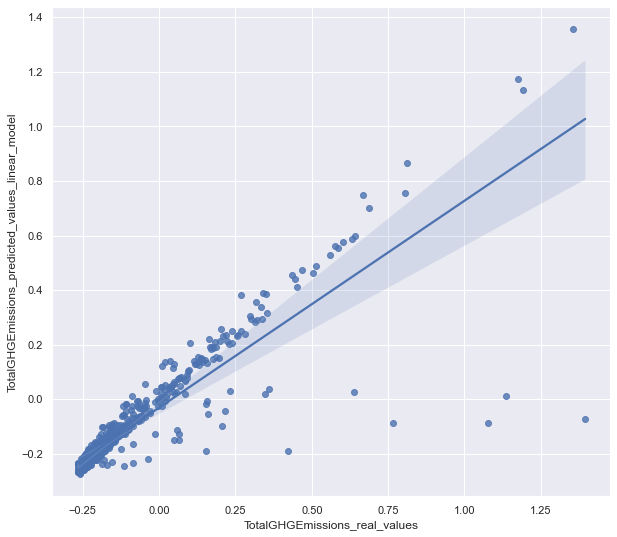

In [395]:
# https://seaborn.pydata.org/tutorial/regression.html

plt.subplots(figsize=(10, 9))
sns.regplot(x="TotalGHGEmissions_real_values", y="TotalGHGEmissions_predicted_values_linear_model", data=real_and_predicted_values_classic_linear_regression_df)

The previous graph shows the linear tendency of correlation between real and predicted values, which suggests that the linear regression model of ordinary least squares has a good level of prediction.

In the next graph, we will show a comparison between real and predicted values, by sorting out the data.

In [396]:
real_and_predicted_values_classic_linear_regression_df = real_and_predicted_values_classic_linear_regression_df.sort_values(by=['TotalGHGEmissions_real_values'])

In [397]:
list_y_GHG_emissions_size = [i for i in range(len(real_and_predicted_values_classic_linear_regression_df))]

In [398]:
real_and_predicted_values_classic_linear_regression_df['x_values_for_visualization'] = list_y_GHG_emissions_size

In [399]:
real_and_predicted_values_classic_linear_regression_df.head()

,TotalGHGEmissions_real_values,TotalGHGEmissions_predicted_values_linear_model,x_values_for_visualization
4701,-0.266035,-0.259845,0
4569,-0.265782,-0.236176,1
4635,-0.265573,-0.233521,2
1594,-0.265483,-0.245045,3
4314,-0.265096,-0.234802,4


<AxesSubplot:xlabel='x_values_for_visualization', ylabel='TotalGHGEmissions_real_values'>

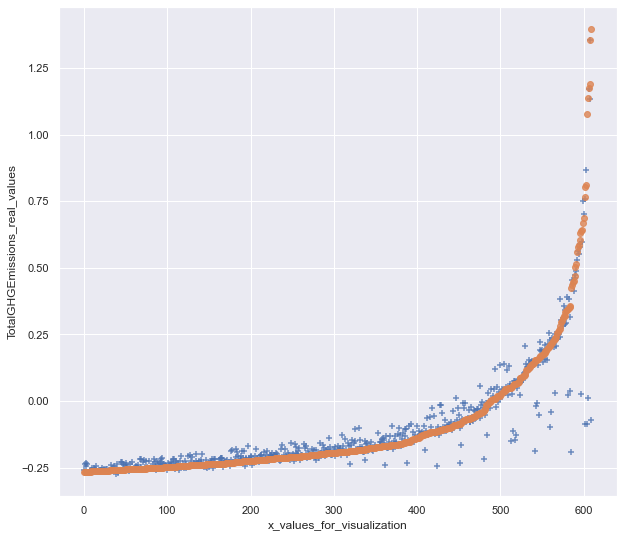

In [400]:
plt.subplots(figsize=(10, 9))
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_predicted_values_linear_model", data=real_and_predicted_values_classic_linear_regression_df, fit_reg=False, marker='+')
sns.regplot(x="x_values_for_visualization", y="TotalGHGEmissions_real_values", data=real_and_predicted_values_classic_linear_regression_df, fit_reg=False)


The previous graph shows how predicted values (blue points) vary from real values (orange points), so that we can visualize the effectiveness of the linear regression model.

As linear regression has no parameters, there is no way to control the complexity of the model. For this, we’ll add regularization.

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

### Ridge Regression (L2 Regularization)

Ridge regression imposes a penalty on the size of the coefficents. Here we want the magnitude of the coefficients to be minimized so that each feature has as little effect on the outcome as possible. See reference:

https://github.com/terrah27/ml_guides/blob/main/linear_models_regression.ipynb

In [401]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

We start by performing a cross validation for the Ridge regression by following the example in reference: 
https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn

Our next goal is to create the parameter grid for searching the hyperparameters of the Ridge regression that are going to be optimized. Then we select the score metric to evaluate the model. We then set the number of folds for the cross validation and we select the model, which in this case is Ridge Regression (L2 Regularization).

In [402]:
# Create the parameter grid based on the results of random search
parameter_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = linear_model.Ridge()

#### GridSearch implementation and data modelling visualization

We will create a function that will use the "GridSearchCV" method to cross-validate the hyperparameters of a model on the training set. The function will also provide values of the models performance via the R2 score, the prediction errors such as MSE and MAE, and will produce a graph with the representation of the real and predicted values.

In the first case, we will cross-validate the alpha parameter of a Ridge or Lasso Regression.

In [403]:
def create_and_optimize_model(model_selected, parameter_grid, n_cv, score, target_column_real_values, predicted_values_from_model):

    model_optimized_via_grid_search = model_selection.GridSearchCV(
                                model_selected,                     # Model to fit
                                param_grid = parameter_grid,        # Hyperparameters to test
                                cv = n_cv,                          # Number of folds of crossed validation
                                scoring = score                     # score to optimize
                                )

    # Optimizes the Ridge regression with the training data
    model_optimized_via_grid_search.fit(X_training, y_training)

    # # Shows the best optimized hyperparameters
    print("Best hyperparametre in the training data:")
    print(model_optimized_via_grid_search.best_params_)

    # Shows the corresponding performances
    print("Cross validation results:")
    for mean, std, params in zip(
                                model_optimized_via_grid_search.cv_results_['mean_test_score'], # mean score
                                model_optimized_via_grid_search.cv_results_['std_test_score'],  # score standard deviation
                                model_optimized_via_grid_search.cv_results_['params']           # hyperparameter value
                                ):

        print("{} = {:.3f} (+/-{:.03f}) for {}".format(
                                                        score,
                                                        mean,
                                                        std*2,
                                                        params
                                                    ))

    ''' We use the optimized trained model obtained from the cross validation process to compare predicted and real values. 
        We will asign the prediction probabilities values to the variable y_values_pred'''
    # X_test is the set that is going to be passed to the model. Here we calculate prediction probabilities.
    y_values_pred = model_optimized_via_grid_search.predict(X_test)

    '''We will now obtain the score R2 of the regression'''
    print("The coefficient of determination of the prediction of the model, R2, is equal to: {}".format
                                                (model_optimized_via_grid_search.score(X_test, y_test))) 
                                                # y_test corresponds to the known (real) values to predict the target column values

    ''' We can obtain the error loss of the prediction model. For this we will use Mean Square Error (MSE) and Mean Absolute Error (MAE). 
        Consult reference https://www.dataquest.io/blog/understanding-regression-error-metrics/ '''
    print("Mean squared error for the model is: {}".format
                                                (mean_squared_error(y_test, y_values_pred)))
    print("Mean absolute error for the model is: {}".format
                                                (mean_absolute_error(y_test, y_values_pred)))

    '''We create a data frame that will contain the real and predicted values '''
    real_and_predicted_values_df = pd.DataFrame()
    real_and_predicted_values_df[target_column_real_values] = y_test
    real_and_predicted_values_df[predicted_values_from_model] = y_values_pred

    ''' We will now plot the real and the predicted values of the target column from the prediction model'''
    # https://seaborn.pydata.org/tutorial/regression.html
    plt.subplots(figsize=(10, 9))
    sns.regplot(x=target_column_real_values, y=predicted_values_from_model, data=real_and_predicted_values_df)
 
    '''We will plot sorted read and predicted data points for a better visualization and comparison'''
    real_and_predicted_values_df = real_and_predicted_values_df.sort_values(by=[target_column_real_values])
    list_y_size = [i for i in range(len(real_and_predicted_values_df))]
    real_and_predicted_values_df['x_values_for_visualization'] = list_y_size

    plt.subplots(figsize=(10, 9))
    sns.regplot(x='x_values_for_visualization', y=predicted_values_from_model, data=real_and_predicted_values_df, fit_reg=False, marker='+')
    sns.regplot(x='x_values_for_visualization', y=target_column_real_values, data=real_and_predicted_values_df, fit_reg=False)


Best hyperparametre in the training data:
{'alpha': 1e-07}
Cross validation results:
r2 = 0.823 (+/-0.185) for {'alpha': 1e-07}
r2 = 0.823 (+/-0.185) for {'alpha': 1e-06}
r2 = 0.823 (+/-0.185) for {'alpha': 1e-05}
r2 = 0.823 (+/-0.185) for {'alpha': 0.0001}
r2 = 0.823 (+/-0.185) for {'alpha': 0.001}
r2 = 0.823 (+/-0.185) for {'alpha': 0.01}
r2 = 0.823 (+/-0.185) for {'alpha': 0.1}
r2 = 0.823 (+/-0.185) for {'alpha': 1}
r2 = 0.821 (+/-0.183) for {'alpha': 10}
The coefficient of determination of the prediction of the model, R2, is equal to: 0.7700007572099938
Mean squared error for the model is: 0.012380198108796384
Mean absolute error for the model is: 0.033523716339413485


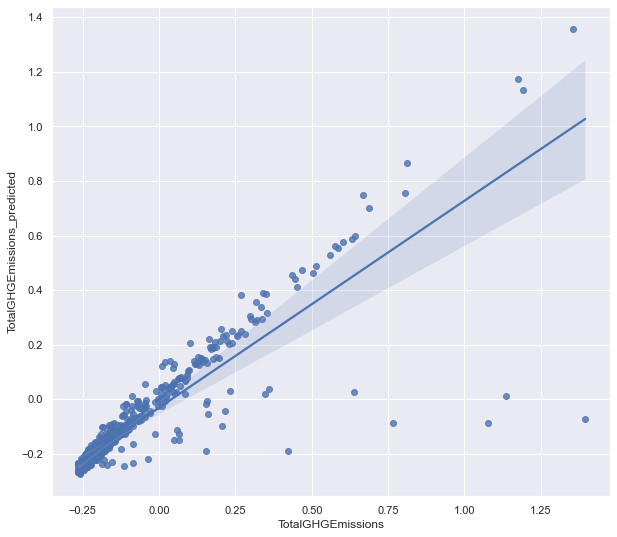

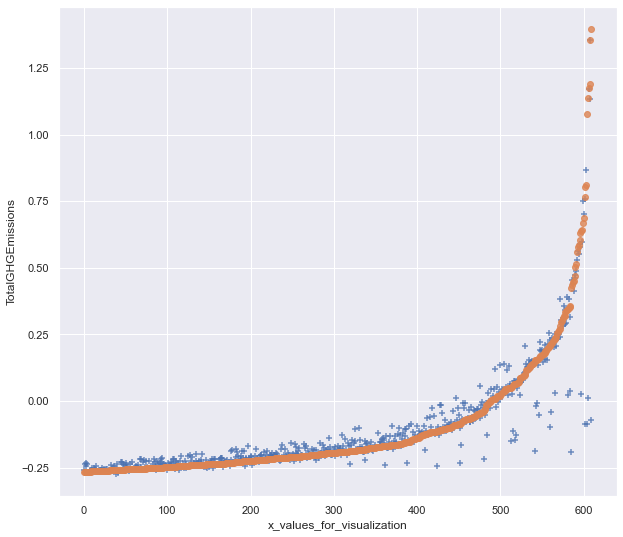

In [404]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score, 'TotalGHGEmissions', 'TotalGHGEmissions_predicted')

In the previous cell we obtained the best hyperparameters of the linear regression with Ridge regularization, so that we could also train an optimized model and measure its performance on unseen data. Here, the coefficient of determination R2 from Ridge regularization, is close to the value of R2 obtained from Ordinary Least Squares linear regression alone (0.68), and the same occurred with the values of MSE and MAE.

We will apply next a Lasso regularization to see if such penalization improves the results of predictions or if the error loss decreases.

### Lasso Regression (L1 Regularization)

Lasso regression uses L1 regularization to force some coefficents to be exactly zero which means they are ignored by the model. This can be used as a type of feature selection! Lasso can make the model easier to interpret and reveal the most important features.

In [405]:
from sklearn.linear_model import Lasso

from sklearn import linear_model

We will perform a cross validation for the Lasso regression to optimize the hyperparameters and the model, by executing the create_and_optimize_model() function.

We create the parameter grid for searching the hyperparameters of the Lasso regression that are going to be optimized. Then we select the score metric to evaluate the model and the model.

In [406]:
# Create the parameter grid based on the results of random search
parameter_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = linear_model.Lasso()

Best hyperparametre in the training data:
{'alpha': 0.0001}
Cross validation results:
r2 = 0.823 (+/-0.185) for {'alpha': 1e-07}
r2 = 0.823 (+/-0.185) for {'alpha': 1e-06}
r2 = 0.823 (+/-0.185) for {'alpha': 1e-05}
r2 = 0.823 (+/-0.186) for {'alpha': 0.0001}
r2 = 0.823 (+/-0.187) for {'alpha': 0.001}
r2 = 0.772 (+/-0.186) for {'alpha': 0.01}
r2 = -0.003 (+/-0.010) for {'alpha': 0.1}
r2 = -0.003 (+/-0.010) for {'alpha': 1}
r2 = -0.003 (+/-0.010) for {'alpha': 10}
The coefficient of determination of the prediction of the model, R2, is equal to: 0.7697713411313863
Mean squared error for the model is: 0.012392546916853538
Mean absolute error for the model is: 0.03342426545284845


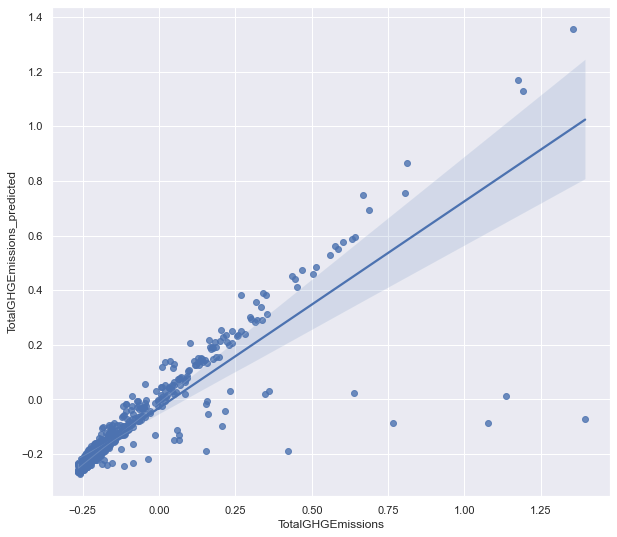

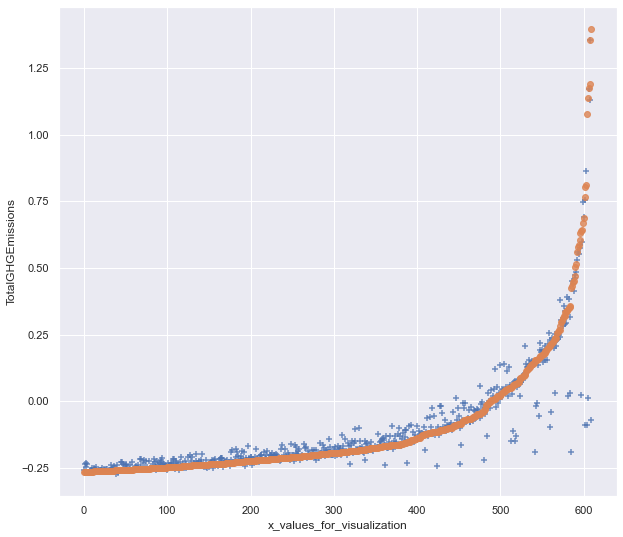

In [407]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score, 'TotalGHGEmissions', 'TotalGHGEmissions_predicted')

We now obtained the best hyperparameters of the linear regression with Lasso regularization. We also trained an optimized model and measured its performance on unseen data. 
This time, the coefficient of determination R2 (0.68) resulted slighly different than the one obtained from Ridge regularization (0.69) and Ordinary Least Squares linear regression alone (0.68). With the Lasso regularization, we did not observe significative differences from the MSE and MAE values obtained with Ridge and no-regularization.


For this reason, we will evaluate the performance of a random forest regressor model.

### Analysis using a random forest regresson

We import the model of random forest for regression.

In [408]:
from sklearn import model_selection

from sklearn.ensemble import RandomForestRegressor

In [409]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
rf_reg = RandomForestRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(rf_reg, X_training, y_training, scoring='r2', cv=cv)

In [410]:
#view mean absolute error
print('Array of R2 for each k-fold: ', scores)
print('mean R2: ', np.mean(scores))
print('R2 std: ', np.std(scores))

Array of R2 for each k-fold:  [0.94007133 0.79373043 0.97366831 0.9644063  0.87178278 0.96896275
 0.97183849 0.68044917 0.76482114 0.75458372]
mean R2:  0.8684314423627354
R2 std:  0.10528200911888845


From the above result, we observe that the performance of the random forest regressor is superior to that of the linear ordinary least squares regression and the Ridge and Lasso regularization.

We can create now the parameter grid for searching the hyperparameters of the random forest regressor that are going to be optimized. Then we select the score metric to evaluate the model. In this case, R2. See reference:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://odsc.medium.com/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

In [411]:
# Create the parameter grid based on the results of random search
parameter_grid = {
            'max_depth': [5,10,20],
            'n_estimators': [20,50,100],
            'min_samples_leaf': [2, 3, 4],
            'min_samples_split': [2, 3, 4]
}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = RandomForestRegressor()

Best hyperparametre in the training data:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Cross validation results:
r2 = 0.826 (+/-0.175) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
r2 = 0.835 (+/-0.168) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
r2 = 0.832 (+/-0.172) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
r2 = 0.831 (+/-0.175) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}
r2 = 0.834 (+/-0.174) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
r2 = 0.834 (+/-0.172) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
r2 = 0.824 (+/-0.176) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}
r2 = 0.834 (+/-0.172) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samp

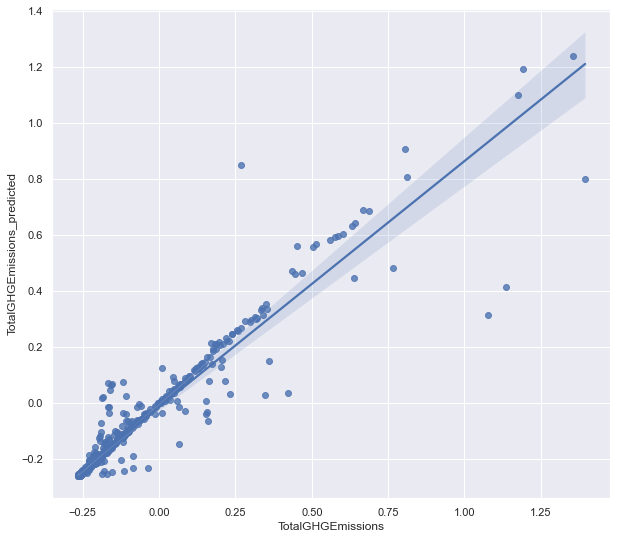

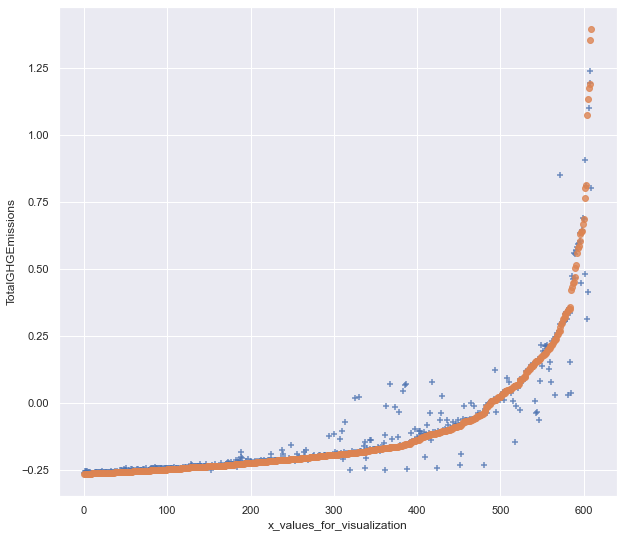

In [412]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score, 'TotalGHGEmissions', 'TotalGHGEmissions_predicted')

The higher value of the coefficient of determination R2 of the random forest regressor and the decrease of error losses in the unseen data, indicate that we can use this model to predict the variables of interest for the project mission.

So far we have tested our model with one of the variables of interest, which is the Green House Gas emissions. Next, we will apply the random forest regressor to make predictions about the property energy consumption.

#### Prediction of energy consumption

In [413]:
X_training, y_training, X_test, y_test = get_training_and_testing_data(df_standardized_without_outliers, 'SiteEnergyUse(kBtu)')

In [414]:
# Create the parameter grid based on the results of random search
parameter_grid = {
            'max_depth': [5,10,20],
            'n_estimators': [20,50,100],
            'min_samples_leaf': [2, 3, 4],
            'min_samples_split': [2, 3, 4]
}

# Number of folds of crossed validation
n_cv = 10

# Selects a score to optimize. Here R2.
score = 'r2'

# creates a model
model_selected = RandomForestRegressor()

Best hyperparametre in the training data:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Cross validation results:
r2 = 0.955 (+/-0.045) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
r2 = 0.955 (+/-0.045) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
r2 = 0.956 (+/-0.045) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
r2 = 0.953 (+/-0.049) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}
r2 = 0.956 (+/-0.046) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
r2 = 0.956 (+/-0.046) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
r2 = 0.955 (+/-0.043) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}
r2 = 0.955 (+/-0.045) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samp

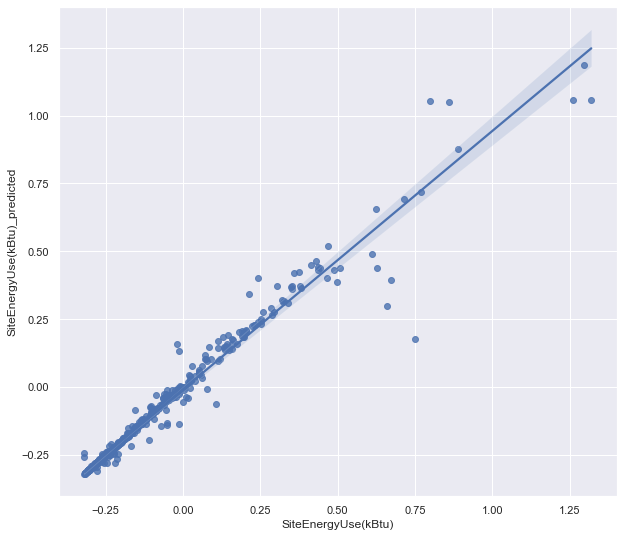

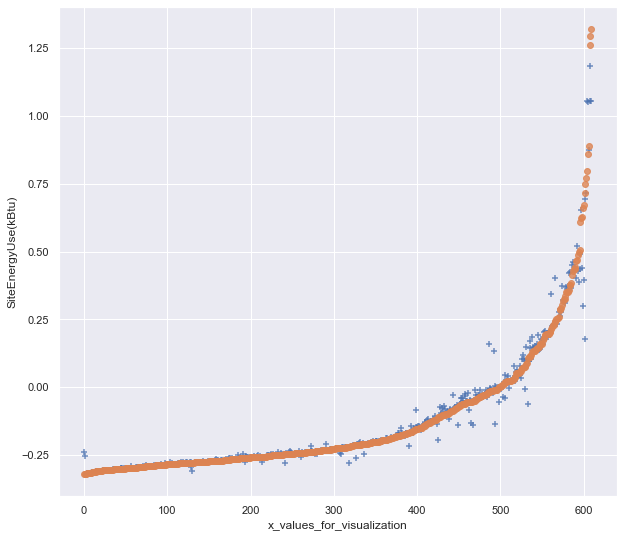

In [415]:
create_and_optimize_model(model_selected, parameter_grid, n_cv, score, 'SiteEnergyUse(kBtu)', 'SiteEnergyUse(kBtu)_predicted')

From the previous result, we observe that as expected, the predicted values obtained from the random forest regressor are highly close to the real values, representing a good choice for data modelling.